# 非阻塞通信
### 问题
● 堵塞和非堵塞通信有什么区别？

● 我如何使用非阻塞通信来提高程序的效率？

### 目标
● 理解阻塞和非阻塞通信的区别

● 理解非阻塞通信如何可以提高程序执行能力

到目前为止，我们已经看到了如何使用阻塞通信发送和接收信息。 在这种情况下，发送方或接收方不能执行任何其他操作，直到发送或接收到相应的信息（准确地说，实际上直到缓冲区安全使用为止）。

阻断通信有许多缺点。在等待调用完成时，可能会浪费潜在的计算时间。并且正如我们所看到的那样，阻塞通讯也可能导致死锁。

另一种方法是允许程序在发送或接收消息时继续执行。这就是非阻塞通信。

在MPI中，使用Isend和Irecv方法实现非阻塞通信。 Isend和Irecv方法分别开始发送和接收操作，然后立即返回。

这些方法返回一个Request类的实例，该实例惟一地标识起动操作。然后可以使用Request类的Test，Wait和Cancel方法来管理完成。参与通信的Request对象和相关内存缓冲区的管理需要仔细的协调。 使用者必须确保暴露其内存缓冲区的对象在涉及非阻塞消息传递操作时不会在Python级别访问。

以下例子执行了与前面演示的相同的简单阻塞发送和接收，但是这次是使用发送和接收方法的非阻塞版本完成的。在非阻塞方法之后立即调用Wait（）会阻塞进程直到相应的发送和接收完成。

创建一个名为mpi5py 包含下面代码的程序：
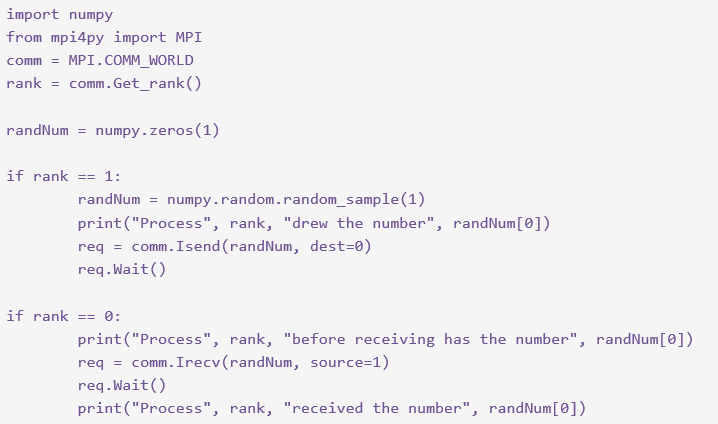

使用以下命令运行这个程序：mpiexec -n 2 python mpi5.py

您应该会看到类似于下面的输出：
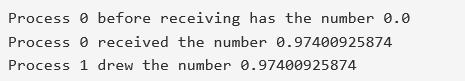

# 挑战
如果你注释掉包含comm.Isend的行和包含comm.Wait调用的两行，会发生什么情况？ 你能解释你看到的吗？

注意：如果您没有注释掉Wait调用，那么你的代码与阻止版本实际上是相同的，并且会死锁。 此外，除非您调用Cancel，否则Python内核最终会死锁，因为这儿发布的消息数量不等，所以我不建议这样做。

# 非堵塞通讯
现在让我们来创建一个真正的发送和接收程序的非阻塞版本。 请注意，在进程1发送消息之后，也不需要等待进程0发送回复。 但是，进程1需要等待回复是必要的，以至于它知道在尝试将其打印出来之前知道该消息已被完全接收。同样，在尝试计算randNum*2之前，进程0必须等待完整消息。

创建一个名为mpi6.py 包含下面代码的程序。运行它以验证程序是否正常工作。

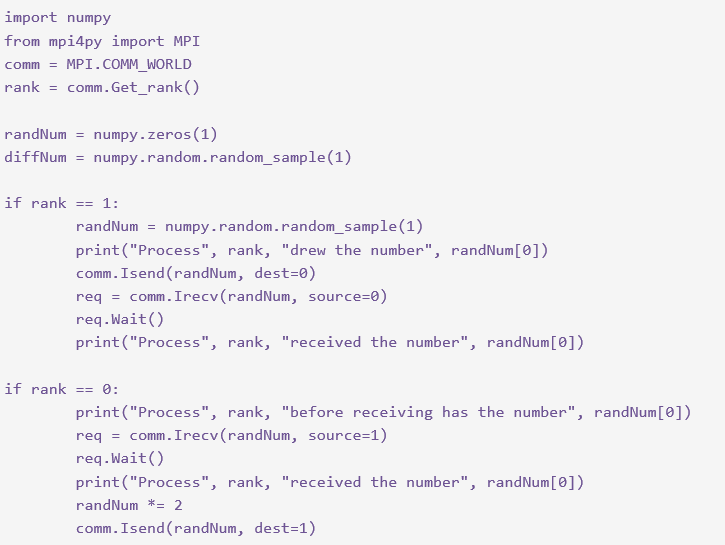

您应该会看到类似于下面的输出：
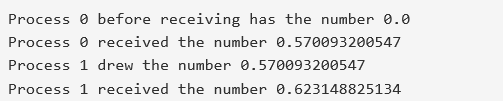

# 重叠的通信和计算
现在让我们修改这个程序，使进程1与一个计算重叠，并发送消息及接收应答。计算应该是除以3.14，然后打印结果。
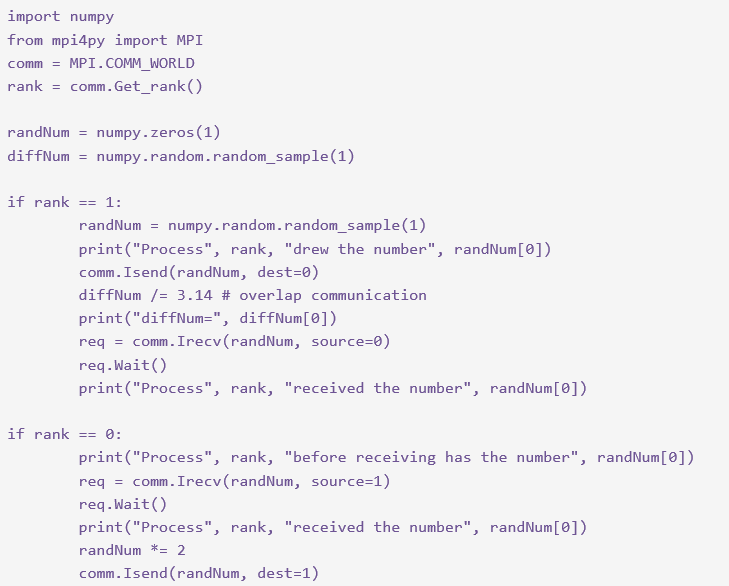

使用以下命令运行这个程序：mpiexec -n 2 python mpi6.py
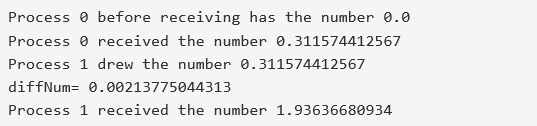

# 其他操作
直到相应的通信完成，Request.Wait方法阻止调用进程。这并不总是令人满意的，所以MPI提供了一种无需等待就可以完成测试的方法。 这是通过使用Request.Test（）方法完成的，这个方法在信息操作完成时将返回True。

当使用非阻塞通信时，有时取消一个待定的通信是有必要的。这是通过调用Request.Cancel（）方法实现的。

# ！关键点
● 对于阻塞和非阻塞通信有不同的方法。

● 通过重叠的通信和计算，可以实现更好的性能。